<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Life Expectancy ✨</b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family: Georgia;">
    <span style="color: #008080;"> Author:</span> 
    <span style="color: black;">Prince Kumar .📄🖋️</span>
</h3>

# 📚 Importing Libraries.

In [199]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None)
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

# ⏳ Loading Datasets.

In [74]:
df = pd.read_csv('Life Expectancy Data.csv')

In [75]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# 🧠 Basic Understanding of Data.

In [76]:
df.shape

(2938, 22)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [78]:
df.isnull().sum().sum()

np.int64(2563)

In [79]:
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [80]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# ⚙️ Data Preprocessing and 📊 (EDA)

# Handling Missing values

In [81]:
impute = KNNImputer()

In [82]:
for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])

In [83]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

<Axes: >

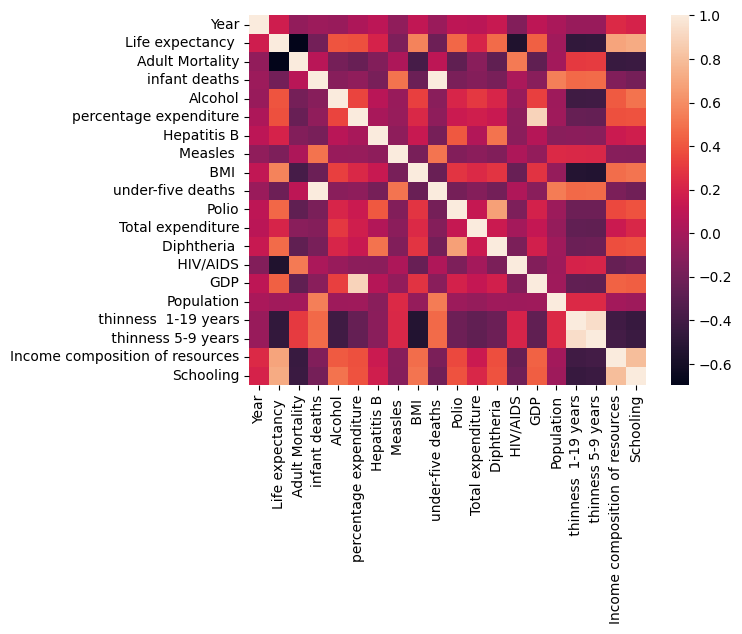

In [85]:
sns.heatmap(df.corr(numeric_only=True))

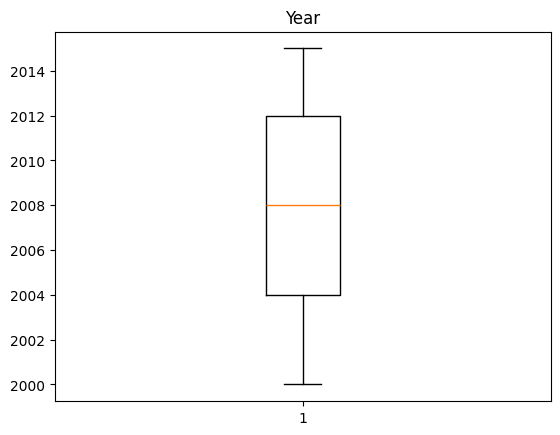

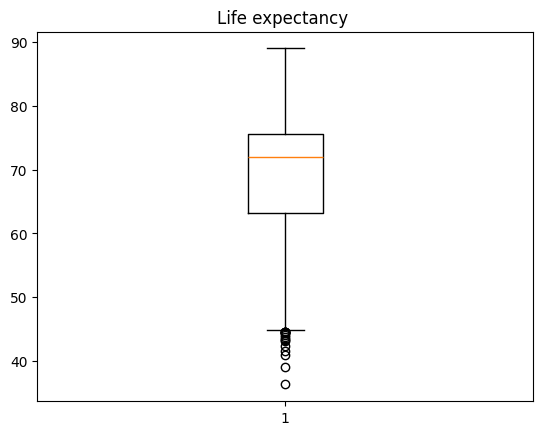

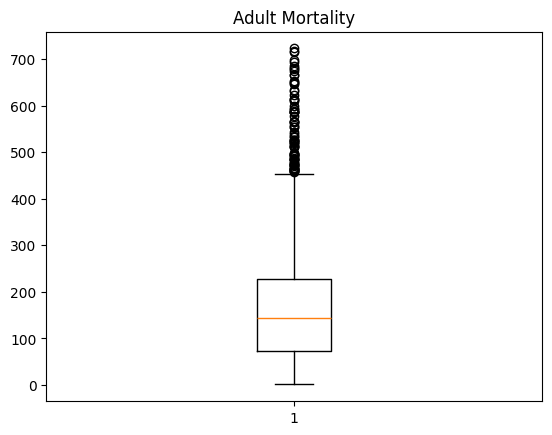

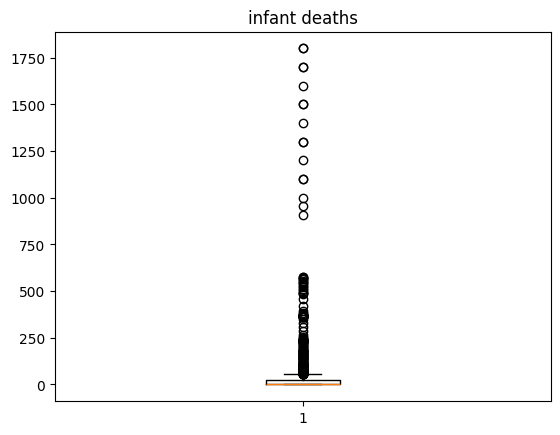

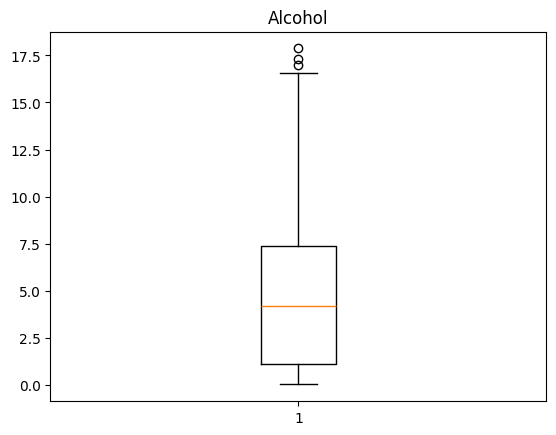

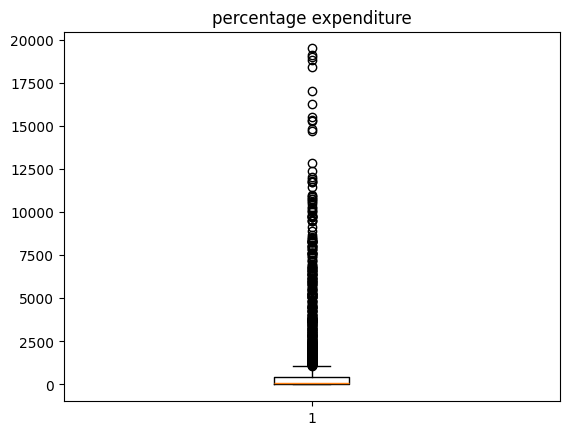

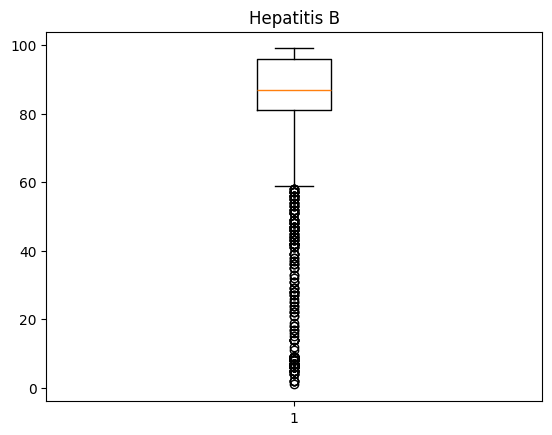

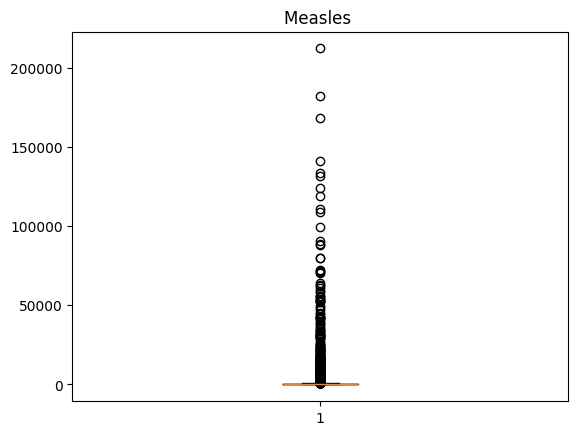

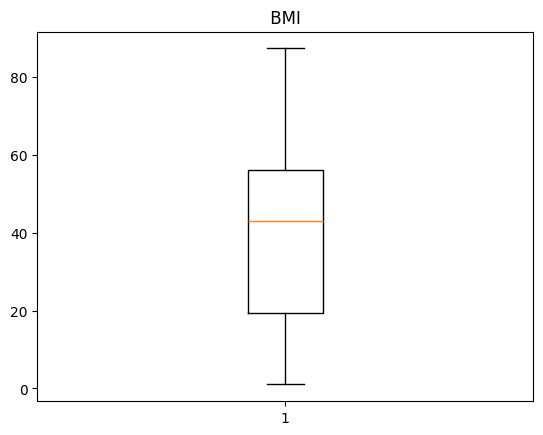

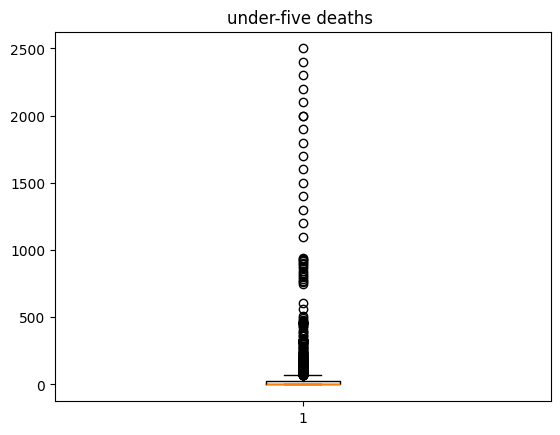

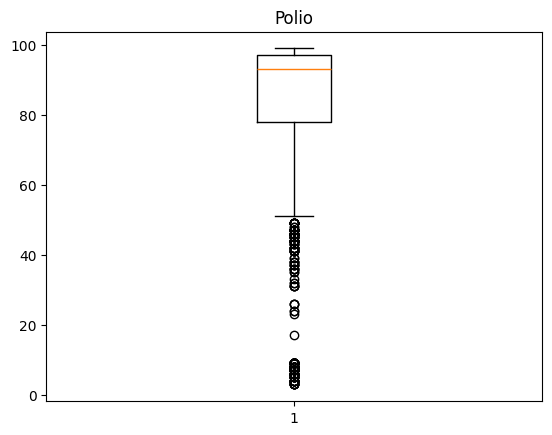

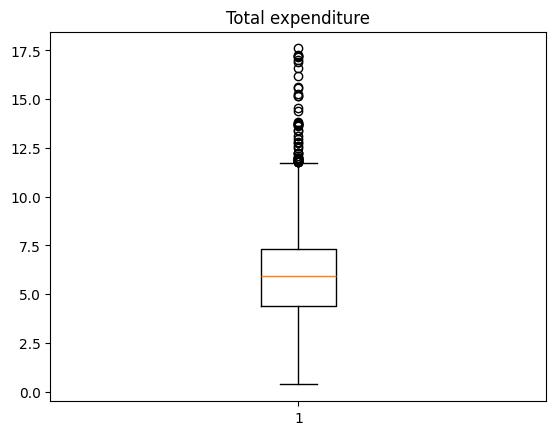

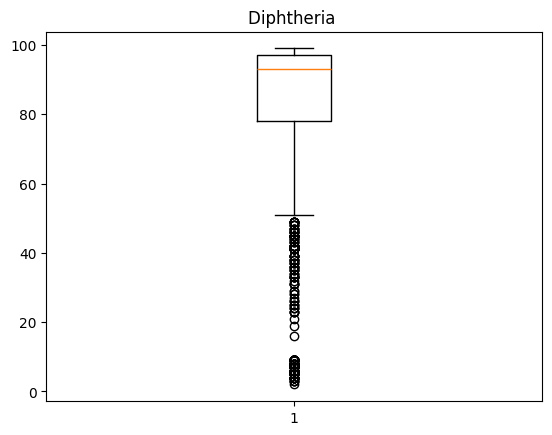

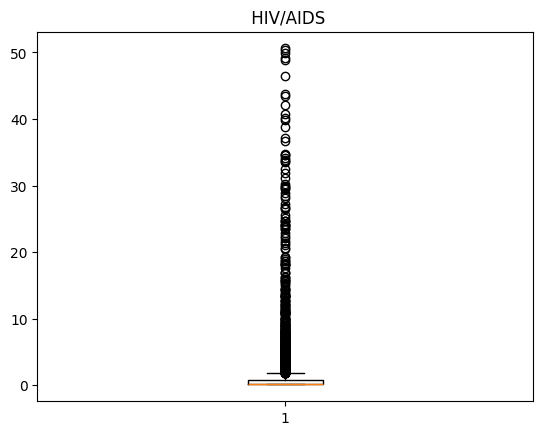

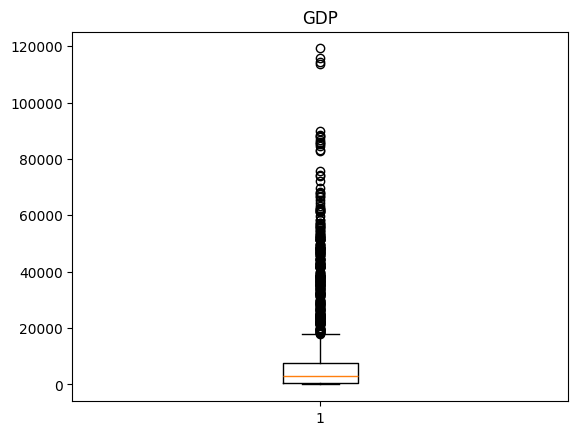

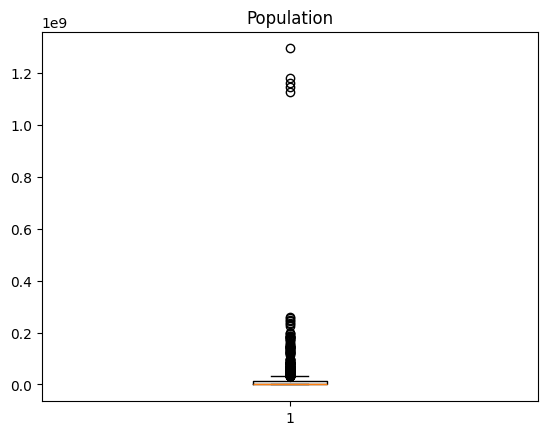

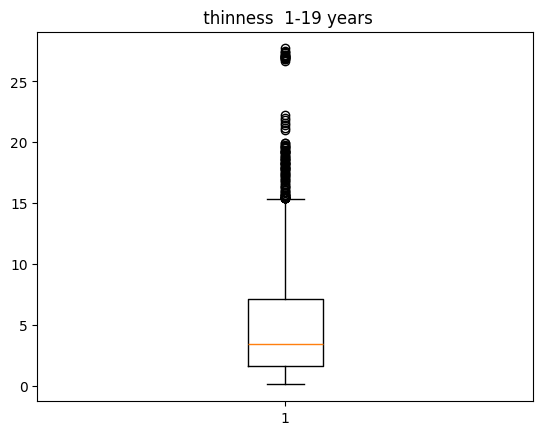

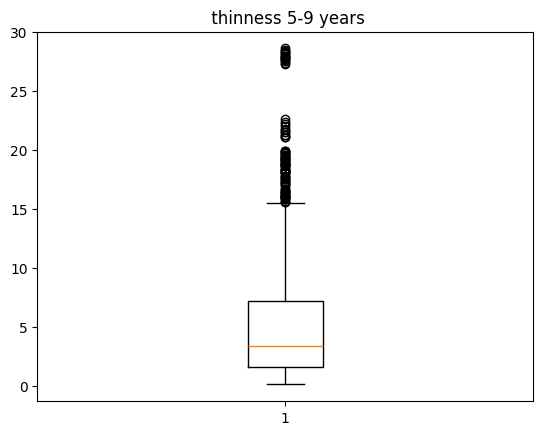

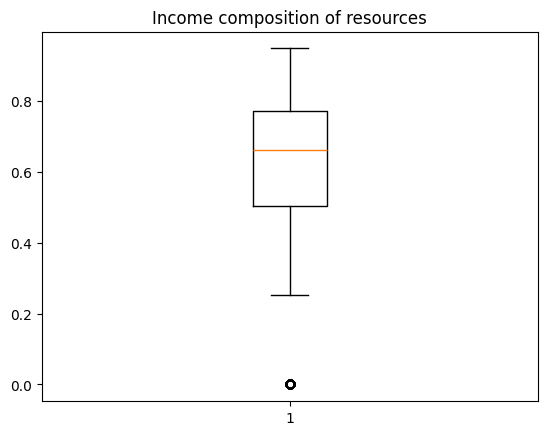

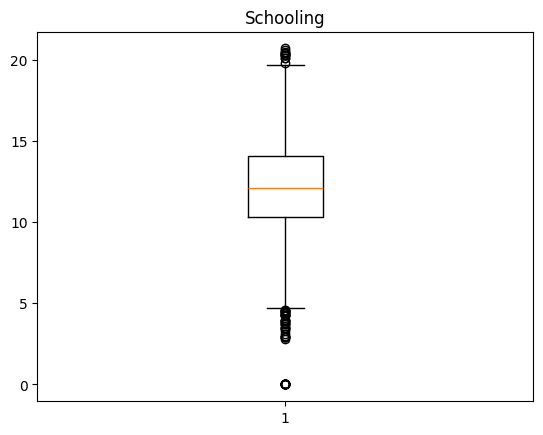

In [86]:
for i in df.select_dtypes(include='number').columns:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

# Treating Outliers In the Data

In [87]:
col = df.columns

In [88]:
# ul = q3+1.5*(IQR
# ll = q1+1.5*(IQR)
# IQR = q3-q1   

In [89]:
def out(col):
    q1 ,q3 = np.percentile(col,[25,76])
    iqr = q3-q1
    lw = q1-1.5*(iqr)
    uw = q3+1.5*(iqr)
    return lw,uw

In [90]:
out(df['GDP'])

(np.float64(-9773.52021495771), np.float64(17837.165679596183))

In [91]:
for i in df.select_dtypes(include='number').columns:
    lw , uw = out(df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])

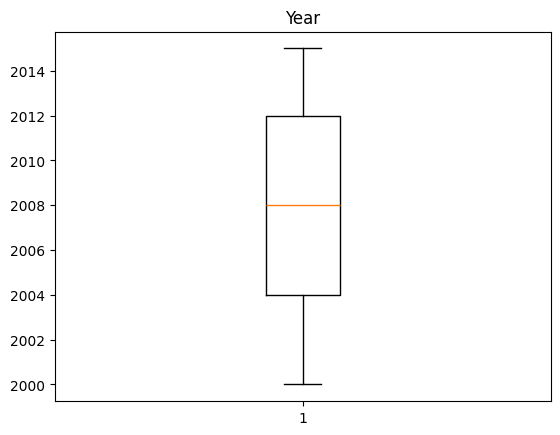

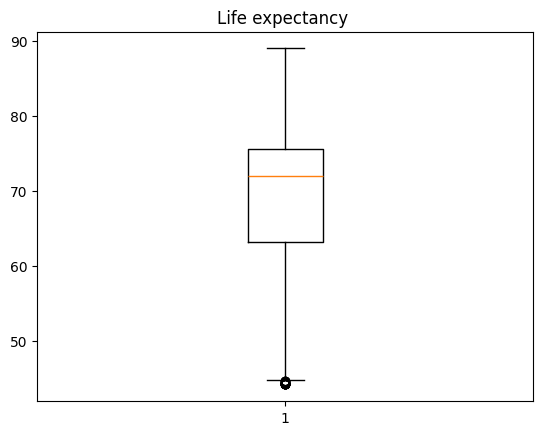

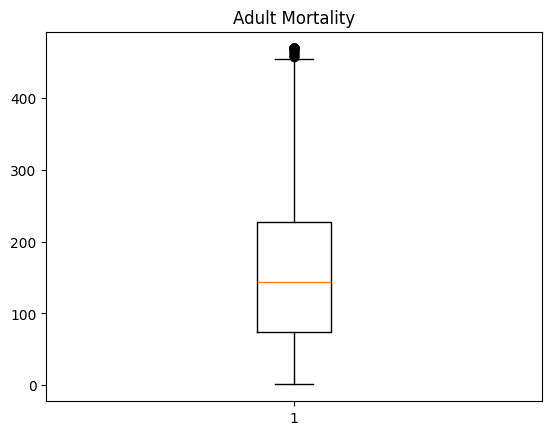

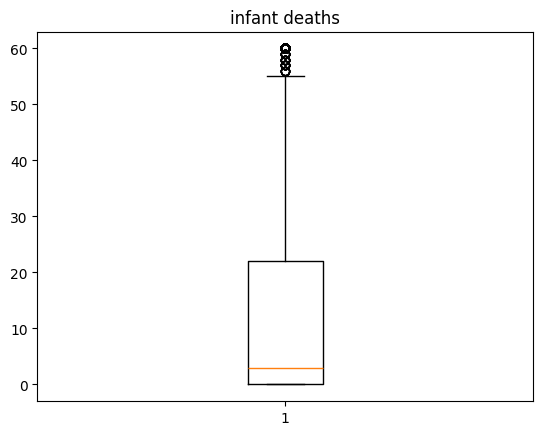

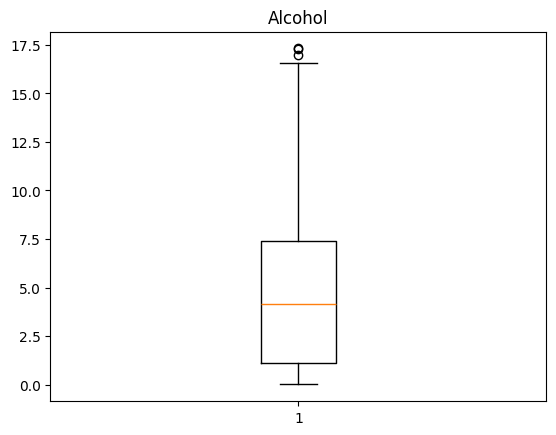

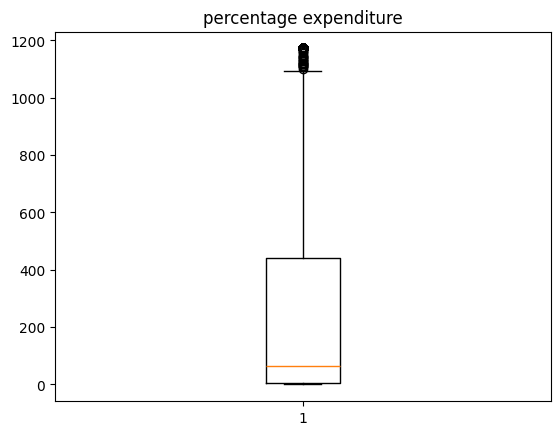

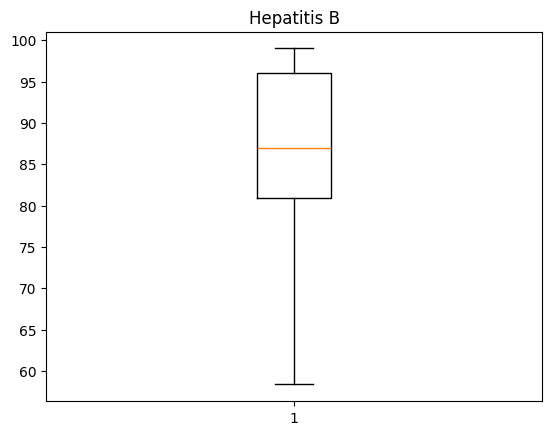

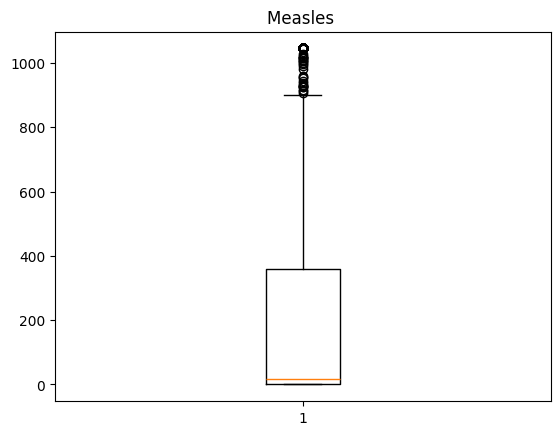

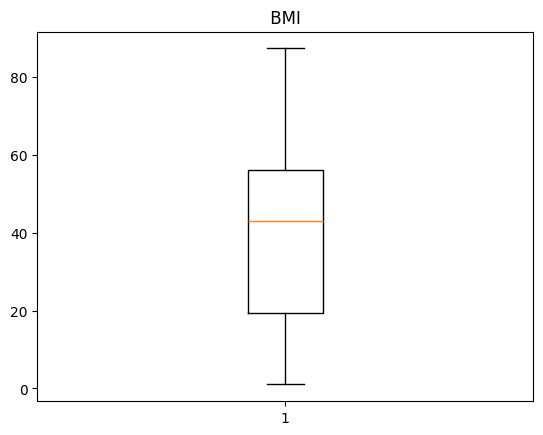

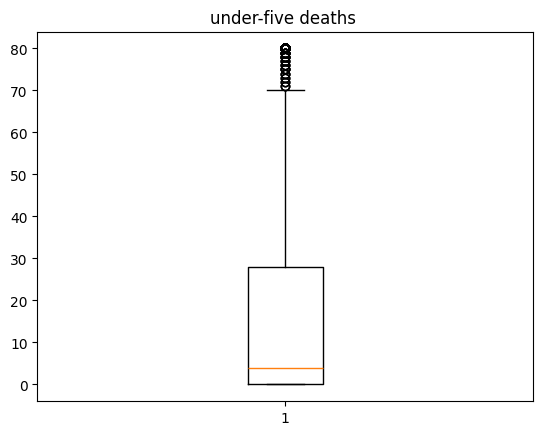

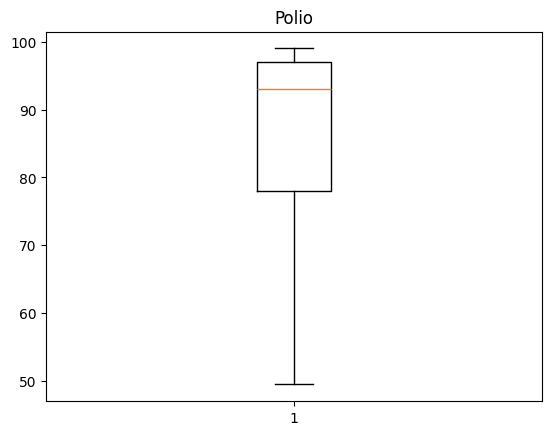

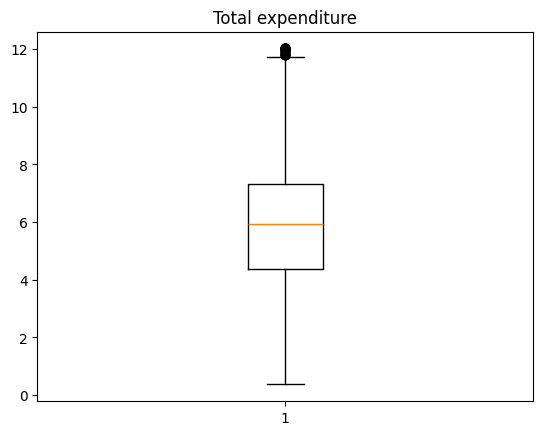

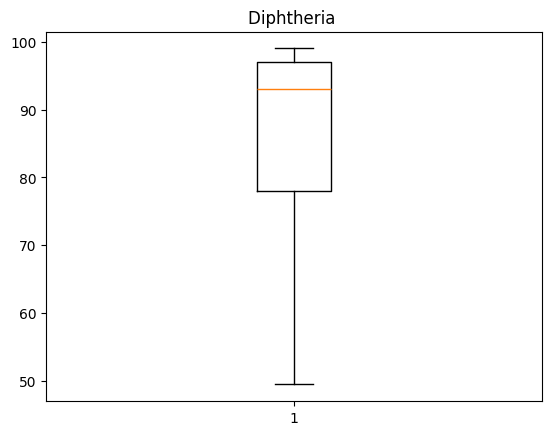

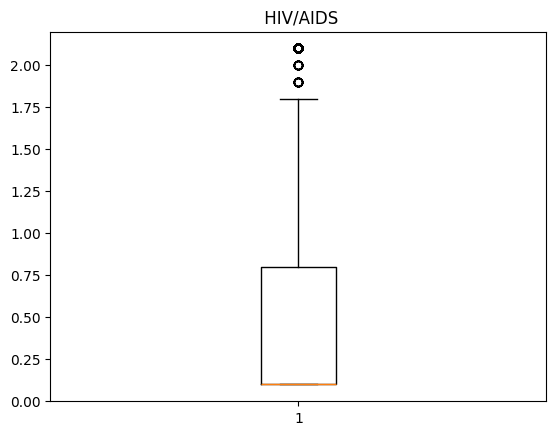

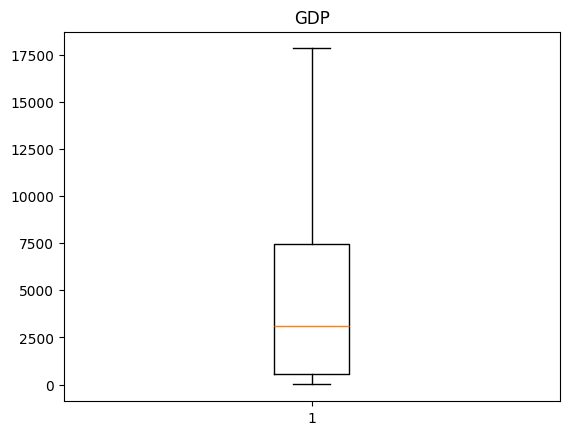

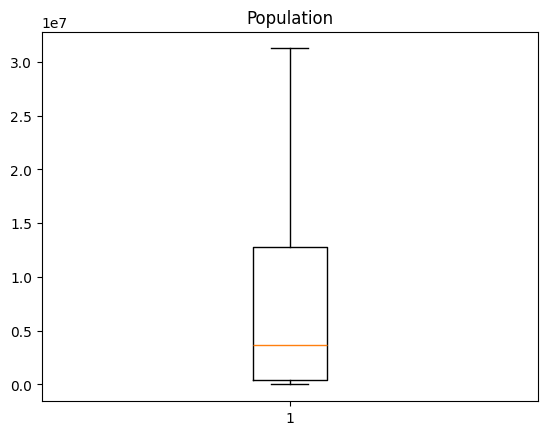

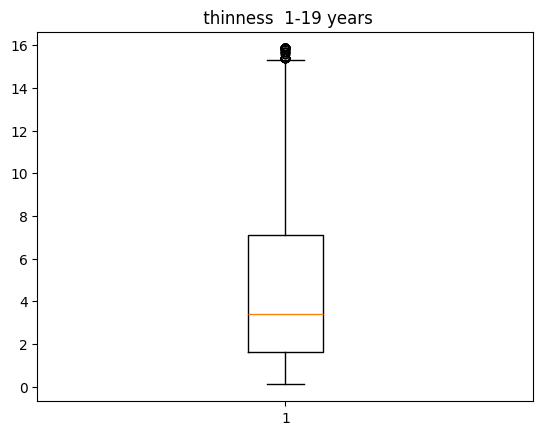

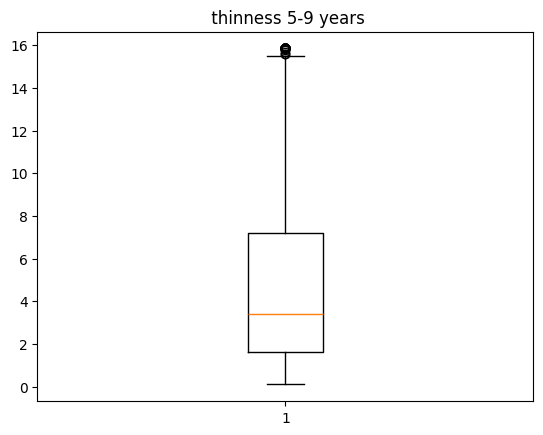

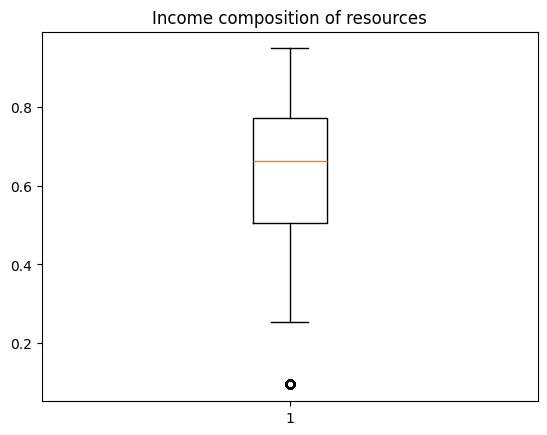

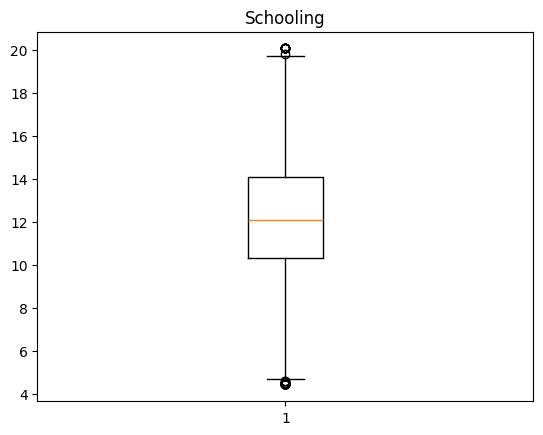

In [92]:
for i in df.select_dtypes(include='number').columns:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [93]:
# I was not able to completedly remove outliers from dataset but i reduce them and somehow treated outlier not fully but mostly.

In [98]:
df.select_dtypes(include='object')

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [99]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [100]:
df['Country'].nunique()

193

In [101]:
df['Country'].value_counts().reset_index()['count'].value_counts()

count
16    183
1      10
Name: count, dtype: int64

In [102]:
# df['Life_Expectancy'] = df['Life expectancy ']

In [103]:
# df.drop('Life expectancy')

In [104]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,60.0,0.01,71.279624,65.000000,1045.0,19.1,80.0,49.5,8.16,65.0,0.1,584.259210,3.125506e+07,15.85,15.85,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,60.0,0.01,73.523582,62.000000,492.0,18.6,80.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.85,15.85,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,60.0,0.01,73.219243,64.000000,430.0,18.1,80.0,62.0,8.13,64.0,0.1,631.744976,3.125506e+07,15.85,15.85,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,60.0,0.01,78.184215,67.000000,1045.0,17.6,80.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.85,15.85,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,60.0,0.01,7.097109,68.000000,1045.0,17.2,80.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.85,15.85,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,469.0,27.0,4.36,0.000000,68.000000,31.0,27.1,42.0,67.0,7.13,65.0,2.1,454.366654,1.277751e+07,9.40,9.40,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,469.0,26.0,4.06,0.000000,58.351153,998.0,26.7,41.0,49.5,6.52,68.0,2.1,453.351155,1.263390e+07,9.80,9.90,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.000000,304.0,26.3,40.0,73.0,6.53,71.0,2.1,57.348340,1.255250e+05,1.20,1.30,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,469.0,25.0,1.72,0.000000,76.000000,529.0,25.9,39.0,76.0,6.16,75.0,2.1,548.587312,1.236616e+07,1.60,1.70,0.427,9.8


In [115]:
df1 = df.groupby(['Country','Status'])['Life expectancy '].agg(['mean']).reset_index()
df1

,Country,Status,mean
0,Afghanistan,Developing,58.193750
1,Albania,Developing,75.156250
2,Algeria,Developing,73.618750
3,Angola,Developing,49.018750
4,Antigua and Barbuda,Developing,75.056250
...,...,...,...
188,Venezuela (Bolivarian Republic of),Developing,73.387500
189,Viet Nam,Developing,74.775000
190,Yemen,Developing,63.862500
191,Zambia,Developing,53.928125


In [119]:
df2 = pd.merge(df,df1,how='outer',on=['Country','Status'])
df2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,mean
0,Afghanistan,2015.0,Developing,65.0,263.0,60.0,0.01,71.279624,65.000000,1045.0,19.1,80.0,49.5,8.16,65.0,0.1,584.259210,3.125506e+07,15.85,15.85,0.479,10.1,58.19375
1,Afghanistan,2014.0,Developing,59.9,271.0,60.0,0.01,73.523582,62.000000,492.0,18.6,80.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.85,15.85,0.476,10.0,58.19375
2,Afghanistan,2013.0,Developing,59.9,268.0,60.0,0.01,73.219243,64.000000,430.0,18.1,80.0,62.0,8.13,64.0,0.1,631.744976,3.125506e+07,15.85,15.85,0.470,9.9,58.19375
3,Afghanistan,2012.0,Developing,59.5,272.0,60.0,0.01,78.184215,67.000000,1045.0,17.6,80.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.85,15.85,0.463,9.8,58.19375
4,Afghanistan,2011.0,Developing,59.2,275.0,60.0,0.01,7.097109,68.000000,1045.0,17.2,80.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.85,15.85,0.454,9.5,58.19375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,469.0,27.0,4.36,0.000000,68.000000,31.0,27.1,42.0,67.0,7.13,65.0,2.1,454.366654,1.277751e+07,9.40,9.40,0.407,9.2,50.48750
2934,Zimbabwe,2003.0,Developing,44.5,469.0,26.0,4.06,0.000000,58.351153,998.0,26.7,41.0,49.5,6.52,68.0,2.1,453.351155,1.263390e+07,9.80,9.90,0.418,9.5,50.48750
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.000000,304.0,26.3,40.0,73.0,6.53,71.0,2.1,57.348340,1.255250e+05,1.20,1.30,0.427,10.0,50.48750
2936,Zimbabwe,2001.0,Developing,45.3,469.0,25.0,1.72,0.000000,76.000000,529.0,25.9,39.0,76.0,6.16,75.0,2.1,548.587312,1.236616e+07,1.60,1.70,0.427,9.8,50.48750


# Feature Selection(Spliting)

In [126]:
x = df2.drop(columns = ['Country','Status','Life expectancy '])
y = df2['Life expectancy ']

In [128]:
ss = StandardScaler()    

In [129]:
x_scaled = ss.fit_transform(x)

In [131]:
x_scaled.shape

(2938, 20)

# 🎯 Model Creation and Evaluation.

In [133]:
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
lr = LinearRegression()

In [139]:
lr.fit(x_train_scaled,y_train_scaled)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [149]:
y_pred_train_lr = lr.predict(x_train_scaled)
y_pred_test_lr = lr.predict(x_test_scaled)


In [180]:
print("R2 Score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_lr)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_lr)))

R2 Score of Model on Training Data is => 0.956769201815004
R2 Score of Model on Testing Data  is => 0.9586681825461232


In [151]:
svm = SVR()

In [154]:
svm.fit(x_train_scaled,y_train_scaled)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [155]:
y_pred_train_svm = svm.predict(x_train_scaled)
y_pred_test_svm = svm.predict(x_test_scaled)

In [181]:
print("R2 Score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_svm)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_svm)))

R2 Score of Model on Training Data is => 0.9462139018314142
R2 Score of Model on Testing Data  is => 0.9519049919843261


In [160]:
knn = KNeighborsRegressor()

In [161]:
knn.fit(x_train_scaled,y_train_scaled)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [162]:
y_pred_train_knn = knn.predict(x_train_scaled)
y_pred_test_knn = knn.predict(x_test_scaled)

In [182]:
print("R2 Score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_knn)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_knn)))

R2 Score of Model on Training Data is => 0.9550149436382755
R2 Score of Model on Testing Data  is => 0.9376899970372284


In [165]:
dt = DecisionTreeRegressor()

In [166]:
dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [169]:
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

In [183]:
print("R2 Score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_dt)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_dt)))

R2 Score of Model on Training Data is => 0.9964059263282387
R2 Score of Model on Testing Data  is => 0.9766721323275811


In [172]:
rf = RandomForestRegressor()
et = ExtraTreesRegressor()

In [173]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [174]:
et.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [176]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [177]:
y_pred_train_et = et.predict(x_train)
y_pred_test_et = et.predict(x_test)

In [184]:
print("R2 Score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_rf)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_rf)))

R2 Score of Model on Training Data is => 0.9964059263282387
R2 Score of Model on Testing Data  is => 0.9766721323275811


In [185]:
print("R2 score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_et)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_et)))

R2 score of Model on Training Data is => 0.9999999999529795
R2 Score of Model on Testing Data  is => 0.9774100762569266


In [186]:
# !pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 5.6 MB/s eta 0:00:13
   - -------------------------------------- 2.4/72.0 MB 5.4 MB/s eta 0:00:13
   - -------------------------------------- 3.4/72.0 MB 4.8 MB/s eta 0:00:15
   -- ------------------------------------- 4.2/72.0 MB 4.7 MB/s eta 0:00:15
   -- ------------------------------------- 5.0/72.0 MB 4.4 MB/s eta 0:00:16
   --- ------------------------------------ 5.8/72.0 MB 4.2 MB/s eta 0:00:16
   --- ------------------------------------ 6.6/72.0 MB 4.1 MB/s eta 0:00:16
   ---- ----------------------------------- 7.6/72.0 MB 4.1 MB/s eta 0:00:16
   ---- ----------------------------------- 8.4/72.0 MB 4.1 MB/s eta 0:00:16
   ----- ---------------------------------- 9.4/72.0 MB 4.1 MB/s eta 0:00:16
   ----- ---------------------------------- 10.5/72.0 MB 4.2 MB/s eta 0:00:15
   ------ --------------------------------- 11.5/72.0 MB 4.2 MB/s eta 0:00:15
   -

In [189]:
from xgboost import XGBRegressor

In [190]:
xg = XGBRegressor()

In [191]:
xg.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [197]:
y_pred_train_xg = xg.predict(x_train)
y_pred_test_xg = xg.predict(x_test)

In [198]:
print("R2 score of Model on Training Data is =>",(r2_score(y_train_scaled,y_pred_train_xg)))
print("R2 Score of Model on Testing Data  is =>",(r2_score(y_test_scaled,y_pred_test_xg)))

R2 score of Model on Training Data is => 0.9996240851459075
R2 Score of Model on Testing Data  is => 0.9714001188944069
